In [1377]:
movies_cabecera = ['Film_Id', 'Title', 'Genre']

movies = pd.read_table('movies.dat', sep = '::', names = mcabecera, encoding='ISO-8859-1')
movies.head()

,Film_Id,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Tan solo cambiando la decodificación del archivo podemos proceder a leer el contenido del mismo. Obervamos que se trata de una serie títulos de películas de las que también sabemos el año y los géneros con las que han sido clasificadas.

Sin embargo, al mismo tiempo vemos que el año de publicación se encuentra en la misma columna que el título, y que la columna de 'Genre' tiene más de un género, por lo que para obtener información más clara primero es necesario separar o eliminar la información que ahora se encuentra mezclada.

En primer lugar, procedemos a crear una nueva columna para el año de publicación y a eliminar esta misma información de la columna original con el título.

In [1378]:
movies['Year'] = movies['Title'].str.replace(r'\D', '')
movies['Title'] = movies['Title'].str.replace(r'\d', '').str.replace('[()]','')

In [1379]:
movies.head()

,Film_Id,Title,Genre,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


Una vez que las columnas con el año y el título muestran la información de manera independiente, podemos proceder a pre-procesar la columna con el género.

Una opción es la de quedarnos tan solo con un género. Para ello, podemos crear una nueva variable con .append() y aplicar un split para obtener cada uno de los generos por separado.

De esta manera, obtenemos una lista de listas con todos los generos que contenía que contiene cada film.

In [1380]:
genero_unico = []
genero_unico

for x in movies.Genre:
    genero_unico.append(x.split('|'))

In [1381]:
genero_unico[:10]

[['Animation', "Children's", 'Comedy'],
 ['Adventure', "Children's", 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', "Children's"],
 ['Action'],
 ['Action', 'Adventure', 'Thriller']]

In [1382]:
len(genero_unico)

3883

Acto seguido, podemos quedarnos con tan sólo uno de los géneros por película. Para ello los seleccionaremos aleatoriamente de la siguiente manera:

In [1383]:
import random

genero_unico_sample = []
genero_unico_sample

for k in genero_unico:
    asample = random.sample(k, 1)
    genero_unico_sample.append(asample)

In [1384]:
genero_unico_sample[:10]

[['Animation'],
 ['Adventure'],
 ['Romance'],
 ['Comedy'],
 ['Comedy'],
 ['Crime'],
 ['Comedy'],
 ['Adventure'],
 ['Action'],
 ['Adventure']]

Una vez tenemos un género por película, convertirmos esta lista de listas en una lista simple.

In [1385]:
genero_unico_random = []

for i in genero_unico_sample:
    genero_unico_random.extend(i)

In [1386]:
genero_unico_random[:10]

['Animation',
 'Adventure',
 'Romance',
 'Comedy',
 'Comedy',
 'Crime',
 'Comedy',
 'Adventure',
 'Action',
 'Adventure']

In [1387]:
movies['Unique_Genre'] = genero_unico_random

movies.head()

,Film_Id,Title,Genre,Year,Unique_Genre
0,1,Toy Story,Animation|Children's|Comedy,1995,Animation
1,2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure
2,3,Grumpier Old Men,Comedy|Romance,1995,Romance
3,4,Waiting to Exhale,Comedy|Drama,1995,Comedy
4,5,Father of the Bride Part II,Comedy,1995,Comedy


In [1389]:
movies_unique_genre = movies[[#'Film_Id',
                 'Title',
                 #'Genre',
                 'Year', 'Unique_Genre']]

movies_unique_genre.head()

,Title,Year,Unique_Genre
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Romance
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy


In [1390]:
movies_unique_genre_plot = movies_unique_genre.groupby(['Unique_Genre'])['Unique_Genre'].aggregate('count')

movies_unique_genre_plot_sorted = movies_unique_genre_plot.sort_values(ascending=False)

movies_unique_genre_plot_sorted

Unique_Genre
Drama          1173
Comedy          825
Thriller        263
Horror          257
Action          246
Romance         229
Sci-Fi          128
Adventure       124
Documentary     121
Children's      106
Crime            97
War              71
Musical          59
Western          50
Mystery          50
Animation        38
Film-Noir        24
Fantasy          22
Name: Unique_Genre, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

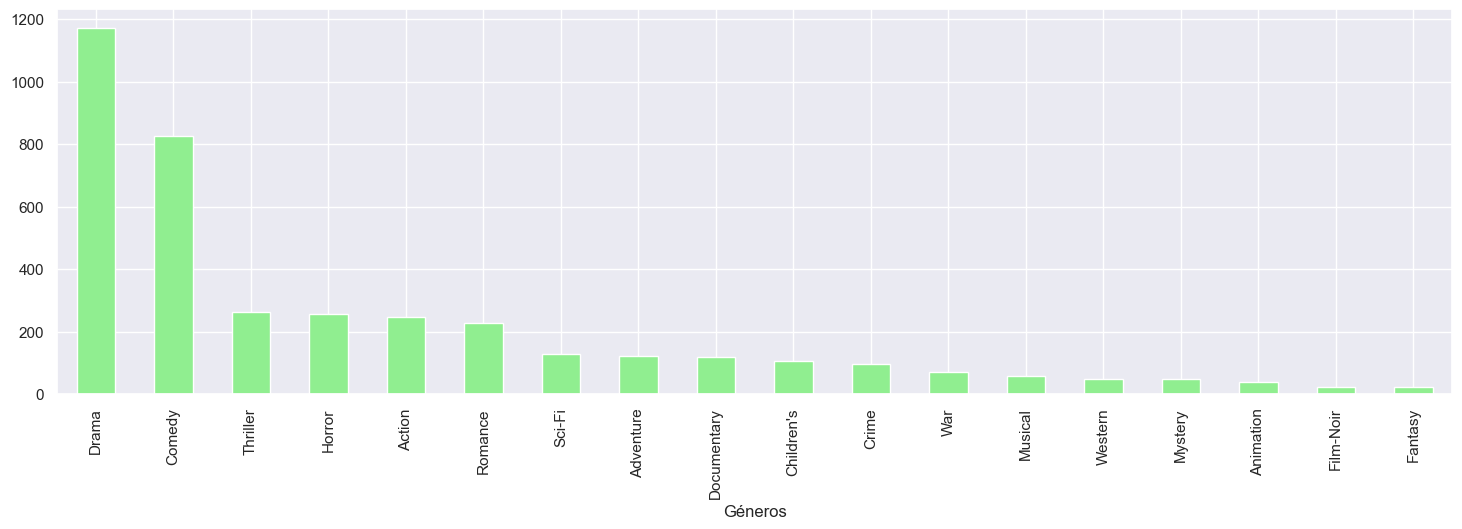

In [1391]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(18,5))
sns.set(font_scale=1)

movies_unique_genre_plot_sorted.plot.bar(xlabel='Géneros', color=['lightgreen'])

plt.show

Con este resultado vemos que la los géneros Comedia y Drama son los más populares con una gran diferencia, por lo que al dejar cada una de las películas con un solo género posiblemente haya conducido a resaltar esta diferencia.

Otra opción es la de conservar todos los géneros asociados originalmente a cada uno de los films, para así crear una columna por cada uno de los 18 géneros.

Lo que sigue se puede encontrar en:
https://github.com/BIDDL3/PRE-PROCESSING-DATA/blob/main/01%20INTRODUCTION%20TO%20VARIABLES.ipynb



In [1392]:
todos_generos = []
todos_generos

for x in movies.Genre:
    todos_generos.extend(x.split('|'))

In [1393]:
todos_generos[:10]

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama']

In [1394]:
type(todos_generos)

list

In [1395]:
len(todos_generos)

6408

In [1396]:
generos = pd.unique(todos_generos)
generos

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [1397]:
len(generos)

18

In [1398]:
len(movies)

3883

In [1399]:
cero_matriz = np.zeros((len(movies), len(generos)))
cero_matriz.shape

(3883, 18)

In [1400]:
cero_matriz

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1401]:
sum(cero_matriz)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [1402]:
len(sum(cero_matriz))

18

In [1403]:
dummies = pd.DataFrame(cero_matriz, columns = generos)
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1404]:
dummies.sum()

Animation      0.0
Children's     0.0
Comedy         0.0
Adventure      0.0
Fantasy        0.0
Romance        0.0
Drama          0.0
Action         0.0
Crime          0.0
Thriller       0.0
Horror         0.0
Sci-Fi         0.0
Documentary    0.0
War            0.0
Musical        0.0
Mystery        0.0
Film-Noir      0.0
Western        0.0
dtype: float64

In [1405]:
dummies.describe()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
count,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1406]:
dummies.columns

Index(['Animation', 'Children's', 'Comedy', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi',
       'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'],
      dtype='object')

In [1407]:
gen = movies.Genre[0]
gen

"Animation|Children's|Comedy"

In [1408]:
gen.split('|')

['Animation', "Children's", 'Comedy']

In [1409]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int64)

In [1410]:
for i, gen in enumerate(movies.Genre):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [1411]:
movies.head()

,Film_Id,Title,Genre,Year,Unique_Genre
0,1,Toy Story,Animation|Children's|Comedy,1995,Animation
1,2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure
2,3,Grumpier Old Men,Comedy|Romance,1995,Romance
3,4,Waiting to Exhale,Comedy|Drama,1995,Comedy
4,5,Father of the Bride Part II,Comedy,1995,Comedy


In [1412]:
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1413]:
dummies.sum()

Animation       105.0
Children's      251.0
Comedy         1200.0
Adventure       283.0
Fantasy          68.0
Romance         471.0
Drama          1603.0
Action          503.0
Crime           211.0
Thriller        492.0
Horror          343.0
Sci-Fi          276.0
Documentary     127.0
War             143.0
Musical         114.0
Mystery         106.0
Film-Noir        44.0
Western          68.0
dtype: float64

In [1414]:
movies_dummies = movies.join(dummies)
movies_dummies.head()

,Film_Id,Title,Genre,Year,Unique_Genre,Animation,Children's,Comedy,Adventure,Fantasy,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,Toy Story,Animation|Children's|Comedy,1995,Animation,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,Comedy|Romance,1995,Romance,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,Comedy|Drama,1995,Comedy,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,Comedy,1995,Comedy,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1415]:
movies_dummies.columns

Index(['Film_Id', 'Title', 'Genre', 'Year', 'Unique_Genre', 'Animation',
       'Children's', 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War',
       'Musical', 'Mystery', 'Film-Noir', 'Western'],
      dtype='object')

In [1416]:
movies_dummies.head()

,Film_Id,Title,Genre,Year,Unique_Genre,Animation,Children's,Comedy,Adventure,Fantasy,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,Toy Story,Animation|Children's|Comedy,1995,Animation,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,Comedy|Romance,1995,Romance,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,Comedy|Drama,1995,Comedy,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,Comedy,1995,Comedy,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1417]:
movies_dummies_plot = movies_dummies[[#'Film_Id', 'Title', 'Genre', 'Year', 'One_Genre',
                                      'Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama',
                                      'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War',
                                      'Musical', 'Mystery', 'Film-Noir', 'Western']]

movies_dummies_plot.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1418]:
movies_dummies_plot.sum()

Animation       105.0
Children's      251.0
Comedy         1200.0
Adventure       283.0
Fantasy          68.0
Romance         471.0
Drama          1603.0
Action          503.0
Crime           211.0
Thriller        492.0
Horror          343.0
Sci-Fi          276.0
Documentary     127.0
War             143.0
Musical         114.0
Mystery         106.0
Film-Noir        44.0
Western          68.0
dtype: float64

Text(0, 0.5, '')

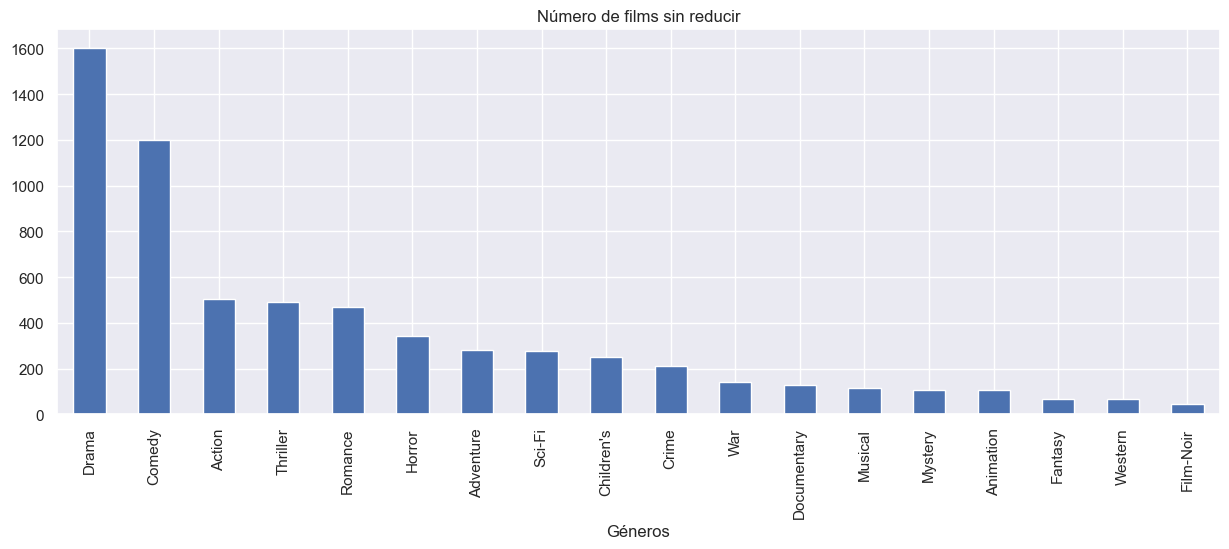

In [1419]:
fig = plt.figure(figsize=(15,5))

movies_dummies_plot_sum = movies_dummies_plot.sum()

movies_dummies_plot_sum_sorted = movies_dummies_plot_sum.sort_values(ascending=False)

movies_dummies_plot_sum_sorted.plot.bar()
plt.title('Número de films sin reducir')
plt.xlabel('Géneros')
plt.ylabel('')

<function matplotlib.pyplot.show(close=None, block=None)>

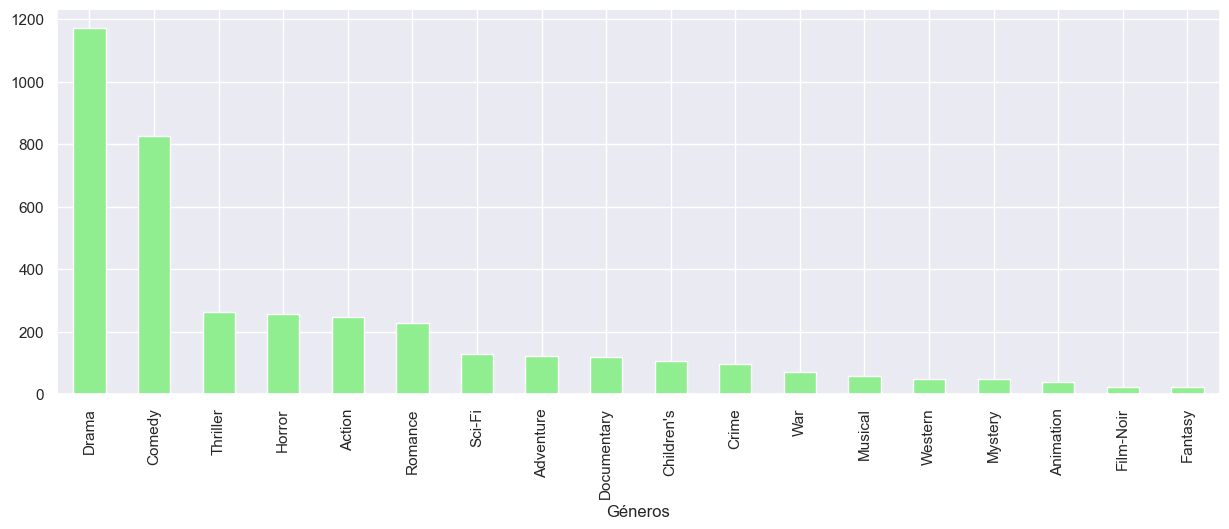

In [1420]:
fig = plt.figure(figsize=(15,5))
sns.set(font_scale=1)

movies_unique_genre_plot_sorted.plot.bar(xlabel='Géneros', color=['lightgreen'])

plt.show

Al comparar ambos gráficos podemos ver que la muestra aleatoria representa con bastante fidelidad el dataset original.